[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

[School of Tomorrow (Home)](School_of_Tomorrow.ipynb)

![animated](anim.gif)

# Generating the Flextegrity Lattice

Our purpose here is to elaborate a classic Python framework for storing and writing geometric information in a variety of formats, suitable for ray tracing and use within CAD programs.

The target architecture we want to model is [Flextegrity](http://c6xty.com), a tension-compression lattice based on holding compression islands in relative positions, in an all-way space. Its inventor is Sam Lanahan.

### CCP (Cubic Close Packing)
The general case CCP lattice will form our background.  The cubic closest packed matrix of balls serves as our "holodeck" (our substitute XYZ grid), for "tuning in" our Flextegrity lattices.

Where spheres touch, they define the diamond faces of a rhombic dodecahedron, each tangent to twelve neighbors.  This marks the "high water mark" for sphere size (inter-tangency) and is the CCP itself.

From [Synergetics](http://www.rwgrayprojects.com/synergetics/findex/fx0900.html):

![RD](rhombic_dodeca_ccp_ball.png)

As spheres begin to contract, without losing their fixed coordinates, we're in a position to study alternative adjoining or holding strategies.  

How might these spheres still connect to each other in a way that preserves their initial positions, and yet allow for abberrational distortions, i.e. flexibility?  Our lattice is not brittle.  Sam's solutions find their roots in Tensegrity, and his own variations in that space, introducing springiness and curvature.

### Elastic Interval Geometry

Tensegrity and [Kenneth Snelson](http://grunch.net/snelson/) are also behind Elastic Interval Geometry, so named by me and one of its chief practitioners, Gerald de Jong.  

That's the same Gerald who contributed our tetravolumes computing algorithm, reminiscent of earlier algorithms for returning a tetrahedron's volume from its six edges.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/39391693474/in/photolist-QangNa-231UJ5S-R1gaQy" title="Computer Volume"><img src="https://live.staticflickr.com/4672/39391693474_c6c54f3d22.jpg" width="500" height="463" alt="Computer Volume"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### CCP in Architecture

The center-to-center strategy is well known to some architects as a space frame patented as the "octet truss" by R. Buckminster Fuller, and featured as "kites" in earlier studies by Alexander Graham Bell.  

NASA went with the octet truss as a basic space frame for orbiting space station designs.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/3604089857/in/photolist-6utUmi-gzmEy1-ekFr83-gzmEhu-5Pskff-5Ff3Hc-5zM26h-7kM3FK-9ho3VF-SihXUN-3Cdjdw-vaBoTv-AUNWd6-r8nXpZ-r8o2un-vTMVDX-vTMXoD-9hrbAY-pnSHJt-pEkQ8L-pEkQb1-pnRKqt-HMv9ay-DFodCy-5bVG87-5bVGd7-6ejsoR-5bRq6a-5bVGj5-HMvahU-dZqij2-dZqjUp-fDCcB4-dZqk5g-dZw32d-dZw2e9-dZw23o-dZqiEr-dZw1HN-dZqjBR-dZqkqp-Sssbwf-S7nkQ3-4oQCpy-5rFY8v-n4cppG-5FjkKG-69L1bK-oBEGJt-oDqycH" title="Octet Truss"><img src="https://live.staticflickr.com/3326/3604089857_033f9f54c2.jpg" width="500" height="375" alt="Octet Truss"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

This lattice also went by the name of Isotropic Vector Matrix (IVM) in the philosophical language of Synergetics, pioneered by R. Buckminster Fuller (RBF). 

More curvilinear versions were employed in geodesic dome structures.  We see more examples of the "octet truss" at PDX (the Portland airport) and at the Business Accelerator building (PSU).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/26239007532/in/album-72157626755979299/" title="DSCF4255"><img src="https://live.staticflickr.com/1539/26239007532_13d4e32283_w.jpg" width="400" height="300" alt="DSCF4255"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/23636692173/in/photolist-DFodCy-Cmg6zo-C1Ge6p" title="Business Accelerator Building"><img src="https://live.staticflickr.com/1584/23636692173_103b411737_w.jpg" width="400" height="300" alt="Business Accelerator Building"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### Flextegrity

Sam Lanahan pioneered a three-way weaving of mutually orthogonal truss members, called struts in some models, that suggest different, possibly flexible, materials.  

Flexibility means countouring, as road pavement matches the contour of the underlying topography.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4249887521/in/photolist-7L5wXK-bFHyv8-8bdGfA-5xKsWB-6iQiQi-aBoaMG-9f5Bg7-6iUv5o-8YLgPj-7txMuM-7vYsSk-cwtfnN-9Y6Jq5-VBwCaX-7Wkd9P-7vYsE6-6CyK5a-7YNVtZ-83biTg-7FqRR3-7NGzHS-7QW944-7wzTcq-6tQosA-5QB1z4-7YS7Uo-8pNRGs-6h9qoA-pkPux3-6CCTpC-7r71wq-9WvZsv-7nJjtA-91Zd3u-68oXAX-91W6pn-7KvFwT-7Pz6gD-8oTV56-8UWce6-7txMip-8iYwQE-crzsp1-7txPja-9Y8Bvq-zCJpe6-Hie7g4-8ryyt2-P6io19-dPU3pc" title="Flextegrity Model"><img src="https://live.staticflickr.com/2650/4249887521_9525392db4_z.jpg" width="640" height="480" alt="Flextegrity Model"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### Cubic Reference Cells

Our cubic reference cell, surrounding any compression island, is defined by the short diagonals of the rhombic dodecahedron's diamond faces.  

The cube and dodeca have relative volumes 3 and 6 (1 and 2).  Each dodeca carves out 1/6th of the six face-adhering neighboring reference cubes, pictured as void (no balls therein). This effectively describes the rhombic dodecahedron: a reference cube with six sixths added (so double the cube's volume).

The rhombic dodecahedron is the space-filler associated with the CCP, with each ball nested snugly inside one.  Diamonds have long and short diagonals.  The twelve short ones define our reference cube.  The twelve long ones define an octahedron.

Relative the tetrahedron of four CCP balls, intertangent, the rhombic dodecahedron is six tetravolumes, the cube three, the octahedron four.

![ ](sphere_pack.png)

From the Fuller Archives:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4147716381/in/photolist-7jw8zp-27m279d-28ryrb8-27m2SHJ-sb9rRn-274R4SM-274RBWX-28rzEyt-27aZfmh-28nawPU-JMAMGp-2hGyuQ1-6Lm3DN-sutG6M-8rBHYW-WgfUsF-6XSpXY-2ypHhr-W18AtK-7DSum6-9dqru5-9dBJbo-XvSatr-ssnvYM-saV86K-Am4sCQ-27m33iL-Vrm16F-rxt3hQ-2g9hw2G-HUjd6Y-qvSspT-suiyJu-pyYUi2-qvJVYB-WBfCVQ-K87vgR-JjTpKz-HoQ4xE-HoPrdA-surYzt-pySJoq-91hkkf-HUjyB7-sb9AwP-ssnxz2-saLYqJ-b4FXeM-rvyvsT-sskHhP" title="Legendary Concentric Hierarchy"><img src="https://live.staticflickr.com/2573/4147716381_7991c273b2.jpg" width="389" height="500" alt="Legendary Concentric Hierarchy"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Consider an icosahedron with its three XYZ golden rectangles parallel to those of our reference cube.  If the rectangles terminate in the cube's faces, then connecting bands to adjacent cube edges will provide a mechanism for inter-icosahedron joining.

![](flextegrity.png)

As the icosahedrons grow such that their phi rectangles protrude through the cubes' faces, into the neighboring cube domains, all six of which are void (empty of sphere centers), the bands from golden rectangle termini, to the surrounding reference cube edges, will potentially slant, like the sides of a tent from a ridge pole, but not as steeply. 

![](test_struts2.png)
![](test_struts.png)

This slanting band will meet another at 180 degrees, coming from a neighboring icosahedron.  Twelve icosahedron's around a nuclear icosahedron, will be held in place in this way.

![](flextegrity3.png)

When the compression island icosahedrons have their phi rectangles flush to the reference cube faces, the X, Y, Z strutworks of the Flextegrity system stay flat, unzigzaggy.  Allowing the compression islands to vary in diameter is what introduces the zigzagging.

![](flextegrity2.png)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/3484407906/in/photolist-7L5wXK-bFHyv8-8bdGfA-5xKsWB-6iQiQi-aBoaMG-9f5Bg7-6iUv5o-8YLgPj-7txMuM-7vYsSk-cwtfnN-9Y6Jq5-VBwCaX-7Wkd9P-7vYsE6-6CyK5a-7YNVtZ-83biTg-7FqRR3-7NGzHS-7QW944-7wzTcq-6tQosA-5QB1z4-7YS7Uo-8pNRGs-6h9qoA-pkPux3-6CCTpC-7r71wq-9WvZsv-7nJjtA-91Zd3u-68oXAX-91W6pn-7KvFwT-7Pz6gD-8oTV56-8UWce6-7txMip-8iYwQE-crzsp1-7txPja-9Y8Bvq-zCJpe6-Hie7g4-8ryyt2-P6io19-dPU3pc/" title="Flextegrity Design"><img src="https://live.staticflickr.com/3539/3484407906_47eec921c5_z.jpg" width="640" height="480" alt="Flextegrity Design"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


## Python Framework

The Python framework we're developing has a generic purpose, of introducing simple vectorial geometry in conjunction with the Concentric Hierarchy well-known to School of Tomorrow students.  The content is in the form of a Jupyter Notebook on Github.

The skeletal Polyhedron below is meant to be subclassed and further fleshed out. This inherited piece provides mechanisms for resizing and translating the beast.  You may imagine adding rotation, as you learn more about vector-based computations based on technologies invented by Heaviside-Gibbs.

Python allows operator overloading such that multiplying a Polyhedron object by a scalar using the asterisk triggers ```__mul__``` or ```__rmul__``` inside the class. 

The scalar is say an int or float, and  will clone the target polyhedron but for its size (its center coordinates remain unchanged). 

A new Polyhedron is delivered, following a more functional model emphasizing immutability of state, and ditto in the case of translation, optionally addable rotation.

Throw away the old one if you don't need it, or let the garbage collector do it.  The alternative, changing a polyhedron in place by default, is considered poor practice by today's lights.

Using the addition operator (the plus symbol) triggers ```__add__``` or ```__radd__```, and by supplying a vector as an argument (like an arrow pointing to "where it should move"), the target polyhedron will thereby  become translated, without resizing or rotating.  

Again, the original polyhedron is unaffected.  New vertexes get created and edge termini updated.  If someone has messed with the facial structure, this will come out in the distillation step. The facial  structure as vertex rings, tuples of consecutive corners, last connecting to first, is the essential topology.  

Acting on all the vertexes effectively scales and/or moves the object, but the Polyhedron so defined need not entangle itself with the original.

```python
>>> t = Tetrahedron()
>>> t2 = t + Qvector((2,1,1,0))
>>> t2.edges 
[Edge from ivm_vector(a=2, b=2, c=1, d=0) to ivm_vector(a=1, b=0, c=0, d=0),
 Edge from ivm_vector(a=2, b=1, c=2, d=0) to ivm_vector(a=1, b=0, c=0, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=2, b=1, c=2, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=1, b=0, c=0, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=2, b=2, c=1, d=0),
 Edge from ivm_vector(a=2, b=2, c=1, d=0) to ivm_vector(a=2, b=1, c=2, d=0)]
```

The strategy in both cases (resizing or moving) is similar:  the vertexes are what anchor the whole show, are the tent stakes as it were.  

To resize and move requires recomputing the vertexes, relative to an origin.  

Additionally, each subclass of Polyhedron needs to bring to the table its own dictionary of labeled faces.

Per the Cube:

```python

        # 6 faces
        self.faces = (('a','f','c','h'),('h','c','e','b'),
                      ('b','e','d','g'),('g','d','f','a'),
                      ('c','f','d','e'),('a','h','b','g'))
```

where these lowercase labels correspond to their uppercase global counterparts, the A-Z of the Concentric Hierarchy.

From the faces, a Polyhedron knows how to distill all the edge pairs.  The Edge is a type of object all on its own, consisting of only two vectors.  A vector, by definition, has its tail at the origin, and so only carries the information for one point in space (relative the fixed origin).  An Edge connects any two vectors, so a Polyhedron may be considered a network of such edges.

In [1]:
class Polyhedron:
    """
    Designed to be subclassed, not used directly
    """
    
    def scale(self, scalefactor):
        if hasattr(self, "volume"):
            self.volume = scalefactor ** 3
        newverts = {}
        for v in self.vertexes:
            newverts[v] = self.vertexes[v] * scalefactor
        newme = type(self)()
        newme.vertexes = newverts      # substitutes new guts
        newme.edges = newme._distill() # update edges to use new verts
        return newme

    __mul__ = __rmul__ = scale

    def translate(self, vector):
        newverts = {}
        for v in self.vertexes:
            newverts[v] = self.vertexes[v] + vector
        newme = type(self)()
        newme.vertexes = newverts      # substitutes new tent stakes
        newme.edges = newme._distill() # update edges to use new verts
        return newme

    __add__ = __radd__ = translate
    
    def _distill(self):

        edges = []
        unique = set()
        
        for f in self.faces:
            for pair in zip(f , f[1:] + (f[0],)):
                unique.add( tuple(sorted(pair)) )
        
        for edge in unique:
            edges.append( Edge(self.vertexes[edge[0]],
                               self.vertexes[edge[1]]) )

        return edges            

As provided, the Edge is little more than a two-vector storing device.  In various frameworks, it might be fleshed out to provide its own rendering methods.  By "rendering" I mean writing out in some other flavor of source code (outside of Python) such as in Scene Description Language (POV-Ray, free, open) or in Rhino (CAD).

Rather than customize the Edge here, the Scene Description Language rendering will be provided externally, as free-standing functions outside of Polyhedron or Edge types.

In [2]:
class Edge:

    """
    Edges are defined by two Vectors (above) and express as cylinder via draw().
    """

    def __init__(self, v0, v1):
        self.v0 = v0  # actual coordinates, not a letter label
        self.v1 = v1
             
    def __repr__(self):
        return 'Edge from %s to %s' % (self.v0, self.v1)

The master function we'll use for rendering a poly is ```draw_poly```.  It takes the poly in question as a first argument, then the filetype object to which the output will go.  Finally, some switches allow turning on and off rendering of specifically edges, vertexes and faces (V + F = E + 2).

In [3]:
def draw_vert(v): pass
def draw_face(f): pass
def draw_edge(e): pass

def draw_poly(p, the_file, v=True, f=False, e=True):
    
    ec = p.edge_color
    er = p.edge_radius
    vc = p.vert_color
    vr = p.vert_radius
    fc = p.face_color
    
    if v:
        for v in p.vertexes.values():
            draw_vert(v, vc, vr, the_file)

    if f:
        for f in p.faces:
            draw_face(f, fc, the_file)

    if e:
        for e in p.edges:
            draw_edge(e, ec, er, the_file)

![](qtet.png)

### Quadray Coordinates

For a change of pace, and to expand our horizons, the vector framework here introduced may seem unfamiliar.  Instead of the three positive and three negative unit vectors, spokes in a "jack" arrangement, we have just four basis vectors, scalable but not rotatable, and use linear combinations of those four to specify our point "out there" from the origin, which is (0,0,0,0).  Instead of a "jack" we're using a "caltrop".

![quadrays](https://upload.wikimedia.org/wikipedia/commons/9/99/Quadray.gif)

As discussed in [Generating the FCC](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/Flextegrity_Lattice.ipynb), all twelve unique permutations of the quadray coordinates {2,1,1,0} give use the CCP positions relative the origin.  We may fill space with the CCP with integral addressing of rhombic dodecahedron centers.

In [4]:
from qrays import Qvector

### Globals: A-Z + Jitterbug

Perhaps controversially, the global namespace gets populated with a set of reference vectors, conveniently A-Z i.e. 26 ASCII characters (consecutive).  These are all vector sums of the original basis vectors, which go from the center of a tetrahedron in four directions, by convention to its points.

The edges of the Tetrahedron formed by the four basis vectors have the lengths we most care about and we measure in CCP sphere radii or diameters.  The Tetrahedron has edges = 1 CCP diameter (2 radii).

We get pretty much all of the Concentric Hierarchy vertexes with A-Z, but for the 12 vertexes of the icosahedron (from which its dual, and rhombic triacontahedron, may be derived).  The bridging to five-fold symmetry is accomplished by means of the Jitterbug Transformation in our curriculum.

In the computations below, the outer 12 positions are transformed into the three mutually orthogonal phi rectangles or "boards" of the icosahedron.

![cubocta](https://upload.wikimedia.org/wikipedia/commons/d/dc/Povlabels.gif)

In [5]:
import math
PHI = (1 + math.sqrt(5))/2.0

A = Qvector((1,0,0,0))
B = Qvector((0,1,0,0))
C = Qvector((0,0,1,0))
D = Qvector((0,0,0,1))
E,F,G,H     = B+C+D, A+C+D, A+B+D, A+B+C
I,J,K,L,M,N = A+B, A+C, A+D, B+C, B+D, C+D
O,P,Q,R,S,T = I+J, I+K, I+L, I+M, N+J, N+K
U,V,W,X,Y,Z = N+L, N+M, J+L, L+M, M+K, K+J

# OPPOSITE DIAGONALS
# ZY WX
# RV OS
# TU PQ
control = (Z - T).length()

midface = (Z + Y)
gold    = 0.5 * PHI * midface/midface.length()
Zi = gold + J/J.length() * control/2
Yi = gold + M/M.length() * control/2

midface = (W + X)
gold    = 0.5 * PHI * midface/midface.length()
Wi = gold + J/J.length() * control/2
Xi = gold + M/M.length() * control/2

midface = (R + V)
gold    = 0.5 * PHI * midface/midface.length()
Ri = gold + I/I.length() * control/2
Vi = gold + N/N.length() * control/2

midface = (O + S)
gold    = 0.5 * PHI * midface/midface.length()
Oi = gold + I/I.length() * control/2
Si = gold + N/N.length() * control/2

midface = (T + U)
gold    = 0.5 * PHI * midface/midface.length()
Ti = gold + K/K.length() * control/2
Ui = gold + L/L.length() * control/2

midface = (P + Q)
gold    = 0.5 * PHI * midface/midface.length()
Pi = gold + K/K.length() * control/2
Qi = gold + L/L.length() * control/2

### Subclassing the Polyhedron Class
Subclassing may now commence.  At this level, customization, a kind of "rust" is tainting our hitherto Platonic framework with abberational details of a specific subculture, that of the POV-Ray users, the raytracers.

Secondary characteristics (as these were known to Descartes) include such not-Platonic features as color, texture, even weight.  Tension and compression start to creep in, as real world properties.  All of this is for the better, but it complicates our code, so we have postponed, until now, any introduction of Scene Description Language.

In [6]:
class Tetrahedron(Polyhedron):
    """
    Tetrahedron
    """
    
    def __init__(self):
        # POV-Ray
        self.edge_color = "rgb <{}, {}, {}>".format(1, 165/255, 0) # orange
        self.edge_radius= 0.03
        self.vert_color = "rgb <{}, {}, {}>".format(1, 165/255, 0) # orange
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>" # not used 
        
        verts = dict(a = Qvector((1,0,0,0)), #A
                     b = Qvector((0,1,0,0)), #B
                     c = Qvector((0,0,1,0)), #C
                     d = Qvector((0,0,0,1))) #D
        
        self.name = "Tetrahedron"
        self.volume = 1  # per Concentric Hierarchy

        # 4 vertices
        self.vertexes = verts
        
        # 4 faces
        self.faces = (('a','b','c'),('a','c','d'),
                      ('a','d','b'),('b','d','c'))

        self.edges = self._distill()

class InvTetrahedron(Polyhedron):
    """
    Inverse Tetrahedron
    """
    
    def __init__(self):
        # POV-Ray
        self.edge_color = "rgb <{}, {}, {}>".format(0, 0, 0) # black
        self.edge_radius= 0.03
        self.vert_color = "rgb <{}, {}, {}>".format(0, 0, 0) # black
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>" # not used 
        
        verts = dict(e = -Qvector((1,0,0,0)), #E
                     f = -Qvector((0,1,0,0)), #F
                     g = -Qvector((0,0,1,0)), #G
                     h = -Qvector((0,0,0,1))) #H
        
        self.name = "InvTetrahedron"
        self.volume = 1  # per Concentric Hierarchy

        # 4 vertices
        self.vertexes = verts
        
        # 4 faces
        self.faces = (('e','f','g'),('e','g','h'),
                      ('e','h','f'),('f','h','g'))

        self.edges = self._distill()
        
class Cube (Polyhedron):
    """
    Cube
    """

    def __init__(self):
        # POV-Ray
        self.edge_color = "rgb <0, 1, 0>"
        self.edge_radius= 0.03
        self.vert_color = "rgb <0, 1, 0>"
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>"

        verts = {}
        for vert_label in "abcdefgh":
            # keep the uppercase A-Z universe (namespace) unobstructed
            verts[vert_label] = eval(vert_label.upper())
                
        self.name = "Cube"
        self.volume = 3  # per Concentric Hierarchy
        
        # 8 vertices
        self.vertexes = verts
        
        # 6 faces
        self.faces = (('a','f','c','h'),('h','c','e','b'),
                      ('b','e','d','g'),('g','d','f','a'),
                      ('c','f','d','e'),('a','h','b','g'))

        self.edges = self._distill()
        

class Octahedron (Polyhedron):
    """
    Octahedron
    """

    def __init__(self):
        # POV-Ray
        self.edge_color = "rgb <1, 0, 0>"
        self.edge_radius= 0.03
        self.vert_color = "rgb <1, 0, 0>"
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>"
        
        verts = {}
        for vert_label in "ijklmn":
            # keep the uppercase A-Z universe unobstructed
            verts[vert_label] = eval(vert_label.upper())

        self.name = "Octahedron"
        self.volume = 4  # per Concentric Hierarchy
        
        # 6 vertices
        self.vertexes = verts

        # 8 faces
        self.faces = (('j','k','i'),('j','i','l'),('j','l','n'),('j','n','k'),                      
                      ('m','k','i'),('m','i','l'),('m','l','n'),('m','n','k'))

        self.edges = self._distill()
        
class RD (Polyhedron):
        """
        Rhombic Dodecahedron
        """

        def __init__(self):
            self.edge_color = "rgb <0, 0, 1>"
            self.edge_radius= 0.03
            self.vert_color = "rgb <0, 0, 1>"
            self.vert_radius= 0.03
            self.face_color = "rgb <0, 0, 0>"

            verts = {}
            for vert_label in "abcdefghijklmn":
                # keep the uppercase A-Z universe unobstructed
                verts[vert_label] = eval(vert_label.upper())
                
            self.name = "RD"
            self.volume = 6  # per Concentric Hierarchy
            # 14 vertices
            self.vertexes = verts

            # 12 faces
            # I,J,K,L,M,N = A+B, A+C, A+D, B+C, B+D, C+D
            self.faces = (('j','f','k','a'),('j','f','n','c'),('j','c','l','h'),('j','h','i','a'),
                          ('m','d','k','g'),('m','d','n','e'),('m','e','l','b'),('m','b','i','g'),
                          ('k','d','n','f'),('n','c','l','e'),('l','h','i','b'),('i','a','k','g'))

            self.edges = self._distill()

![cubocta](https://upload.wikimedia.org/wikipedia/commons/d/dc/Povlabels.gif)

Future editions of this Jupyter Notebook might rely more on the pre-existing globals, A-Z, for getting these polyhedrons off the ground.  The code above goes back to the original Quadray coodinates of each vertex.

In the Cuboctahedron and Icosahedron, the code will marry itself to the global namespace, meaning these types have no stand-alone integrity outside the specific Notebook provided, or another similarly prepopulated.

Experimenting with translation:  create a new Tetrahedron object (canonically sized) and move it to the center of a neighboring CCP position, i.e. to the center of a tangent CCP ball relative the ball at the origin.

In [7]:
t = Tetrahedron()
t2 = t + Qvector((2,1,1,0))
t2.vertexes
t2.edges

[Edge from ivm_vector(a=2, b=2, c=1, d=0) to ivm_vector(a=1, b=0, c=0, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=2, b=2, c=1, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=2, b=1, c=2, d=0),
 Edge from ivm_vector(a=2, b=2, c=1, d=0) to ivm_vector(a=2, b=1, c=2, d=0),
 Edge from ivm_vector(a=2, b=1, c=2, d=0) to ivm_vector(a=1, b=0, c=0, d=0),
 Edge from ivm_vector(a=3, b=1, c=1, d=0) to ivm_vector(a=1, b=0, c=0, d=0)]

## Scene Description Language (POV-Ray)

Since POV-Ray Scene Description Language is a whole world unto itself, much like VRML (Virtual Reality Markup Language), why not provide direct access to the header, so the end user, any reader of this Notebook, is empowered to play with lighting, camera position, available texturing libraries.

Some of the POV-Ray figures rendered in this Notebook will have alternative viewing angles, base on changes to the camera code:

```
// perspective (default) camera
camera {
  location  <4, 0.1, 0.2>
  rotate    <45, 45, 0.0>
  look_at   <0.0, 0.0,  0.0>
  right     x*image_width/image_height
}
```

Our project is not about recreating the capable POV-Ray GUI in some alternative Python compatible GUI widget kit.  That could be fun to undertake, but we're just using povray at the command line, from within the bash shell (orginally on Mac OSX).  Something similar works on Windows, or on Linux (including on a Pi, where POV-Ray may be successfully compiled).

In [35]:
pov_header = \
"""
// Persistence of Vision Ray Tracer Scene Description File
// File: xyz.pov
// Vers: 3.6
// Desc: test file
// Date: Sat Sep  7 09:49:33 2019
// Auth: me
// ==== Standard POV-Ray Includes ====
#include "colors.inc"     // Standard Color definitions
// include "textures.inc"   // Standard Texture definitions
// include "functions.inc"  // internal functions usable in user defined functions

// ==== Additional Includes ====
// Don't have all of the following included at once, it'll cost memory and time
// to parse!
// --- general include files ---
// include "chars.inc"      // A complete library of character objects, by Ken Maeno
// include "skies.inc"      // Ready defined sky spheres
// include "stars.inc"      // Some star fields
// include "strings.inc"    // macros for generating and manipulating text strings

// --- textures ---
// include "finish.inc"     // Some basic finishes
// include "glass.inc"      // Glass textures/interiors
// include "golds.inc"      // Gold textures
// include "metals.inc"     // Metallic pigments, finishes, and textures
// include "stones.inc"     // Binding include-file for STONES1 and STONES2
// include "stones1.inc"    // Great stone-textures created by Mike Miller
// include "stones2.inc"    // More, done by Dan Farmer and Paul Novak
// include "woodmaps.inc"   // Basic wooden colormaps
// include "woods.inc"      // Great wooden textures created by Dan Farmer and Paul Novak

global_settings {assumed_gamma 1.0}
global_settings {ambient_light rgb<1, 1, 1> }

// perspective (default) camera
camera {
  location  <4, 0.1, 0.2>
//  rotate    <45, 45, 0.0>
  look_at   <0.0, 0.0,  0.0>
  right     x*image_width/image_height
}

// create a regular point light source
light_source {
  0*x                  // light's position (translated below)
  color rgb <1,1,1>    // light's color
  translate <-20, 15, 10>
}

// create a regular point light source
light_source {
  0*x                  // light's position (translated below)
  color rgb <1,1,1>    // light's color
  translate <20, -15, -10>
}

background { color rgb <1.0, 1.0, 1.0> }
"""

Finally, lets rewrite the functions left as stubs above.  Our ```draw_poly``` function cycles through all of these in concert.

As we're mainly concerned with polyhedrons in wireframe view (with "wires" as thick or thin as we set their radii), no work was expended on face rendering.

In [9]:
def draw_vert(v, c, r, t): 
    v = v.xyz()
    x,y,z = v.x, v.y, v.z
    data = "< %s, %s, %s >" % (x,y,z), r, c
    template = ("sphere { %s, %s texture "
                "{ pigment { color %s } } no_shadow }")
    print(template % data, file=t)
    
def draw_face(f, c, t): pass

def draw_edge(e, c, r, t):
    v = e.v0.xyz()
    v0 = "< %s, %s, %s >" % (v.x, v.y, v.z)
    v = e.v1.xyz()
    v1 = "< %s, %s, %s >" % (v.x, v.y, v.z)
    data = (v0, v1, r, c)
    template = ("cylinder { %s, %s, %s texture "
                        "{pigment { color %s } } no_shadow }")
    print(template % data, file=t)

In [10]:
with open("demo.pov", "w") as target:
    target.write(pov_header)
    cube = Cube()
    octa = Octahedron()
    rd   = RD()
    draw_poly(cube, target)
    draw_poly(octa, target)
    draw_poly(rd, target)

![](demo.png)

In [11]:
with open("testme.pov", "w") as target:
    target.write(pov_header)
    cube = Cube() * 2
    tetra = Tetrahedron() * 2
    invtetra = InvTetrahedron() * 2
    draw_poly(cube, target)
    draw_poly(tetra, target)
    draw_poly(invtetra, target)

![](testme.png)

# Further Reading

[Silicon Forest Curriculum](https://medium.com/@kirbyurner/a-silicon-forest-curriculum-in-context-71d6dd5621b1)

## APPENDIX:  Additional Source Code and Renderings

Below are those 12 quadrays to nearest CCP neighbors around the origin.  All 26 A-Z reference points are similarly integral (and positive in canonical form).

By means of translation, we may conjure a cube at the origin, clone it around, and put some other figure inside each, appropriately scaled.

A sphere in particular may be:

* tangent to the reference cube's six faces
* tangent to the reference cube's 12 mid-edges (high water mark)
* internal to the cube (shrinking)
* bulging from the cube (growing)

Now mentaly replace each sphere with a compression island, perhaps an icosahedron, and you're ready to weave some Flextegrity!

In [12]:
from itertools import permutations
g = permutations((2,1,1,0))
unique = {p for p in g}  # set comprehension
print(unique)

{(0, 1, 1, 2), (1, 0, 1, 2), (2, 0, 1, 1), (0, 2, 1, 1), (0, 1, 2, 1), (1, 2, 1, 0), (1, 1, 2, 0), (2, 1, 1, 0), (1, 0, 2, 1), (1, 2, 0, 1), (2, 1, 0, 1), (1, 1, 0, 2)}


![cubocta](https://upload.wikimedia.org/wikipedia/commons/d/dc/Povlabels.gif)

In [13]:
class Cuboctahedron (Polyhedron):

    def __init__(self):
        # 8 vertices
        self.edge_color = "rgb <1, 1, 0>"
        self.edge_radius= 0.03
        self.vert_color = "rgb <1, 1, 0>"
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>"

        self.vertexes = dict(o =  O,
                             p =  P,
                             q =  Q,
                             r =  R,
                             s =  S,
                             t =  T,
                             u =  U,
                             v =  V,
                             w =  W,
                             x =  X,
                             y =  Y,
                             z =  Z)
        self.name = "Cuboctahedron"
        
        # 6 faces
        self.faces = (('o','w','s','z'),('z','p','y','t'),
                      ('t','v','u','s'),('w','q','x','u'),
                      ('o','p','r','q'),('r','y','v','x'),
                      ('z','s','t'),('t','y','v'),
                      ('y','p','r'),('r','q','x'),
                      ('x','u','v'),('u','s','w'),
                      ('w','q','o'),('o','z','p'))

        self.edges = self._distill()

In [14]:
def twelve_around_one(p):
    twelve = [ ]
    for v in unique:
        trans_vector = Qvector(v)
        twelve.append(p + trans_vector)
    return twelve

In [15]:
with open("cubocta.pov", "w") as target:
    target.write(pov_header) 
    cubocta = Cuboctahedron()
    cube = Cube()
    draw_poly(cubocta, target)
    for c in twelve_around_one(cube):
        draw_poly(c, target)

![ ](cubocta.png)

In [16]:
with open("sphere_pack.pov", "w") as target:
    target.write(pov_header)
    cube = Cube()
    rd   = RD()
    cubocta = Cuboctahedron()
    draw_poly(cube, target)
    draw_poly(rd, target)
    for p in twelve_around_one(cube):
        draw_poly(p, target)
    for p in twelve_around_one(rd):
        draw_poly(p, target)
    cubocta.vert_radius = Qvector((2,1,1,0)).length()/2 # grow the balls
    cubocta.vert_color = "rgb <1,0,0>"
    draw_poly(cubocta, target, v=True, e=False)
    draw_vert(Qvector((0,0,0,0)), c=cubocta.vert_color, 
              r=cubocta.vert_radius, t=target)

In [17]:
# !/usr/local/bin/povray +A +H768 +W1024 sphere_pack.pov

![ ](sphere_pack.png)

In [18]:
sm_radius = (A-F).length()/2

In [19]:
with open("smaller_sphere_pack.pov", "w") as target:
    target.write(pov_header) 
    c = Cube()
    draw_poly(c, target)
    for c in twelve_around_one(c):
        draw_poly(c, target)
    cubocta.vert_radius = sm_radius
    cubocta.vert_color  = "rgb <1,0,0>"
    draw_poly(cubocta, target, v=True, e=False)
    draw_vert(Qvector((0,0,0,0)), c=cubocta.vert_color, 
              r=cubocta.vert_radius, t=target)

![ ](smaller_sphere_pack.png)

In [20]:
class Icosahedron (Polyhedron):

    def __init__(self):
        # 8 vertices
        self.edge_color = "rgb <0, 1, 1>"
        self.edge_radius= 0.03
        self.vert_color = "rgb <0, 1, 1>"
        self.vert_radius= 0.03
        self.face_color = "rgb <0, 0, 0>"

        self.vertexes = dict(o =  Oi,
                             p =  Pi,
                             q =  Qi,
                             r =  Ri,
                             s =  Si,
                             t =  Ti,
                             u =  Ui,
                             v =  Vi,
                             w =  Wi,
                             x =  Xi,
                             y =  Yi,
                             z =  Zi)
        self.name = "Icosahedron"
        
        # 20 faces
        # OPPOSITE DIAGONALS of cubocta
        # ZY WX
        # RV OS
        # TU PQ
        self.faces = (('o','w','s'),('o','z','s'),
                      ('z','p','y'),('z','t','y'),
                      ('t','v','u'),('t','s','u'),
                      ('w','q','x'),('w','u','x'),
                      ('p','o','q'),('p','r','q'),
                      ('r','y','v'),('r','x','v'),
                      ('z','s','t'),('t','y','v'),
                      ('y','p','r'),('r','q','x'),
                      ('x','u','v'),('u','s','w'),
                      ('w','q','o'),('o','z','p'))

        self.edges = self._distill()

![cubocta](https://upload.wikimedia.org/wikipedia/commons/d/dc/Povlabels.gif)

In [21]:
ico = Icosahedron()

In [22]:
with open("jitterbug.pov", "w") as target:
    target.write(pov_header) 
    c   = Cube()
    ico = Icosahedron() * (1/PHI * math.sqrt(2)/2)
    draw_poly(c, target, f=False)
    draw_poly(ico, target, f=False)

![icosa](jitterbug.png)

In [23]:
with open("flextegrity.pov", "w") as target:
    target.write(pov_header) 
    cube   = Cube()
    draw_poly(cube, target)
    for c in twelve_around_one(cube):
        draw_poly(c, target, f=False)
    ico = Icosahedron() * (1/PHI * math.sqrt(2)/2) * 0.7
    draw_poly(ico, target)
    for ik in twelve_around_one(ico):
        draw_poly(ik, target)

![](flextegrity.png)

In [24]:
class Struts(Polyhedron):
    
    def __init__(self, c=None, ico=None):

        self.edge_color = "rgb <1, 0, 0>"
        self.edge_radius= 0.02
        self.vert_color = "rgb <1, 0, 0>"
        self.vert_radius= 0.02
        self.face_color = "rgb <0, 0, 0>"
        
        if not c and not ico:
            c = Cube()
            ico = Icosahedron()
        
        self.vertexes = dict(
            # cube mid-edges
            af = (c.vertexes['a'] + c.vertexes['f'])/2,
            ag = (c.vertexes['a'] + c.vertexes['g'])/2,
            ah = (c.vertexes['a'] + c.vertexes['h'])/2,
            be = (c.vertexes['b'] + c.vertexes['e'])/2,
            bh = (c.vertexes['b'] + c.vertexes['h'])/2,
            bg = (c.vertexes['b'] + c.vertexes['g'])/2,
            ce = (c.vertexes['c'] + c.vertexes['e'])/2,
            cf = (c.vertexes['c'] + c.vertexes['f'])/2,
            ch = (c.vertexes['c'] + c.vertexes['h'])/2,
            de = (c.vertexes['d'] + c.vertexes['e'])/2,
            df = (c.vertexes['d'] + c.vertexes['f'])/2,
            dg = (c.vertexes['d'] + c.vertexes['g'])/2,
            # icosa mid-edges
            # OPPOSITE DIAGONALS of cubocta
            # ZY WX
            # RV OS
            # TU PQ
            os = (ico.vertexes['o'] + ico.vertexes['s'])/2,
            pq = (ico.vertexes['p'] + ico.vertexes['q'])/2,
            rv = (ico.vertexes['r'] + ico.vertexes['v'])/2,
            tu = (ico.vertexes['t'] + ico.vertexes['u'])/2,
            wx = (ico.vertexes['w'] + ico.vertexes['x'])/2,
            yz = (ico.vertexes['y'] + ico.vertexes['z'])/2
        )

        self.name  = 'struts'
            
        self.faces = (('os', 'af'), ('os', 'ch'),
                      ('rv', 'be'), ('rv', 'dg'), 
                      ('tu', 'cf'), ('tu', 'de'),
                      ('pq', 'ah'), ('pq', 'bg'),
                      ('yz', 'ag'), ('yz', 'df'),
                      ('wx', 'bh'), ('wx', 'ce'))   
            
        self.edges = self._distill()

In [25]:
with open("test_struts.pov", "w") as target:
    target.write(pov_header) 
    ico = Icosahedron() * 0.6
    cube= Cube() * PHI * 1.5
    s   = Struts(cube, ico)
    draw_poly(ico, target)
    draw_poly(cube, target)
    draw_poly(s, target)

![](test_struts.png)

In [26]:
with open("test_struts2.pov", "w") as target:
    target.write(pov_header) 
    ico = Icosahedron() * 1.2
    cube= Cube() * PHI * 1.5
    s   = Struts(cube, ico)
    draw_poly(ico, target)
    draw_poly(cube, target)
    draw_poly(s, target)

![](test_struts2.png)

In [27]:
with open("flextegrity2.pov", "w") as target:
    target.write(pov_header) 
    c   = Cube()
    ico  = Icosahedron() * (1/PHI * math.sqrt(2)/2)
    st   = Struts(c, ico)
    draw_poly(ico, target)
    draw_poly(st, target)
    for ik in twelve_around_one(ico):
        draw_poly(ik, target)
    for s in twelve_around_one(st):
        draw_poly(s, target)

![](flextegrity2.png)

In [28]:
with open("flextegrity3.pov", "w") as target:
    target.write(pov_header) 
    c   = Cube()
    ico  = Icosahedron() * (1/PHI * math.sqrt(2)/2) * 1.1 # a little outside reference cube
    st   = Struts(c, ico)
    draw_poly(ico, target)
    draw_poly(st, target)
    for ik in twelve_around_one(ico):
        draw_poly(ik, target)
    for s in twelve_around_one(st):
        draw_poly(s, target)

![](flextegrity3.png)

In [29]:
with open("flextegrity4.pov", "w") as target:
    target.write(pov_header) 
    c   = Cube()
    ico  = Icosahedron() * (1/PHI * math.sqrt(2)/2) * 0.6 # a little inside reference cube
    st   = Struts(c, ico)
    draw_poly(ico, target)
    draw_poly(st, target)
    for ik in twelve_around_one(ico):
        draw_poly(ik, target)
    for s in twelve_around_one(st):
        draw_poly(s, target)

![](flextegrity4.png)

In [39]:
import os

def animation(targdir="anim"):
    
    path = os.path.join(".",targdir)
    if not os.path.isdir(targdir):
        os.mkdir(targdir)
    
    radii = np.linspace(1.2, 0.8, 8).tolist()
    radii += reversed(radii[1:-1])
    for frame_id, radius in enumerate(radii, start=1):
        filename = f"flextegrity{frame_id:03}.pov"

        with open(os.path.join(path,filename), "w") as target:
            target.write(pov_header) 
            cube = Cube()
            ico  = Icosahedron() * (1/PHI * math.sqrt(2)/2) * radius 
            st   = Struts(cube, ico)
            draw_poly(ico, target)
            draw_poly(st, target)
            draw_poly(cube, target)
            for ik in twelve_around_one(ico):
                draw_poly(ik, target)
            for c in twelve_around_one(cube):
                draw_poly(c, target)
            for s in twelve_around_one(st):
                draw_poly(s, target)
                
animation()

![animated](anim.gif)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/PIL/__init__.py
786432
(768, 1024)


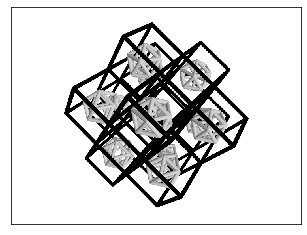

In [30]:
from PIL import Image # Image is a module!
import PIL
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
    
im = Image.open("flextegrity.png")
data = np.array(im)

print(PIL.__file__)

layer = data[:,:,2] # grab a single layer
print(layer.size)
print(layer.shape)

%matplotlib inline
# each color band has 8-bit values
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
imshow(layer, cmap='gray', vmin=0, vmax=255);

## Bonus Feature

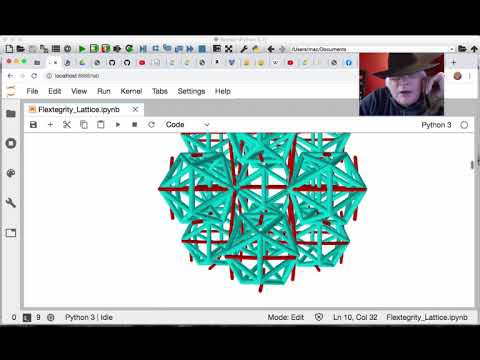

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo("NLSBdkEVqXU") 